## Casptone Project: Healthfirst Facilities Analysis

In this notebook, I will analyze data sets on Healthfirst seating assignments and seating availability for employees. I will perform some exploratory data analysis, clean the data and run some statisticals analysis utilizing Python and create visualizations in Tableau. 

The employee data showing their seat assignments is coming from Workday (2024 & 2023) and the seating data is coming from Archibus. 

In [1]:
#importing all libraries needed
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#reading data sets to dataframes
df_2024 = pd.read_excel("Worker_Data_for_Facilities_for_Analytics_2024-05-30.xlsx", index_col = 0)
df_2023 = pd.read_excel("Worker_Data_for_Facilities_for_Analytics_2023-07-31.xlsx", index_col = 0)
df_archibus =  pd.read_excel("Archibus_facilities.xlsx")


In [3]:
#Viewing the first 10 rows
df_2024.head(10)

,Worker Type,Worker Status,Job Title,Division,HR Business Unit,Cost Center - Name,Location,Location Type,Archetype,Supervisory Organization,Management Level,Workspace,Building Code,Floor Code,Room Code,Room Category,Room Type,Room Standard
Unique Indicator,,,,,,,,,,,,,,,,,,
1,Employee,Active,AD App Dev,Operations & IT,IT,E&B Program,Remote - NJ,Telecommuter,Remote,IT (Justin Miller),Asst Director,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Employee,Active,MarketPlace FE,State Programs and Commercial,Medicaid,PHSP Facilitated Enrollment,Field - Long Island,Field,Onsite,PHSP Facilitated Enrollment (Tatiana Cano),Individual Contributor,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Employee,Active,Case Manager,Operations & IT,Clinical Operations,Utilization Management - II,Remote - FL,Telecommuter,Remote,Utilization Management (Awina Nueva),Individual Contributor,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Employee,Active,Claims Adjustment Examiner,Operations & IT,Operations,Claims Administration,Remote - NY,Telecommuter,Remote,Claims (Anthwon Broussard),Individual Contributor,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Employee,Active,Case Manager,Operations & IT,Clinical Operations,Utilization Management - I,Remote - NY,Telecommuter,Remote,Utilization Management (Awina Nueva),Individual Contributor,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Employee,Active,Mgr Claims Configuration,Operations & IT,Operations,Provider Resolutions,Hybrid - NY,Headquarters,Hybrid,DSE - Operations (Helen Holmes),Manager,LOC001>14>14-122,LOC001,14.0,14-122,WORKSPACE,WCS,Cubicle Small
7,Employee,Active,MarketPlace FE,State Programs and Commercial,Medicaid,PHSP Facilitated Enrollment,Field - Long Island,Field,Onsite,PHSP Facilitated Enrollment (Andrea Palomar-Ga...,Individual Contributor,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Employee,Active,"Analyst, Batch Operations",Operations & IT,IT,Infrastructure and Ops Program,Remote - NY,Telecommuter,Hybrid,IT (Marc Vancaster),Individual Contributor,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Employee,Active,Mail Operations Clerk,Operations & IT,Operations,Mail Room,100 Church Street,Headquarters,Onsite,Ops Centralized Svcs (Richard Hill),Individual Contributor,LOC001>17>17-204,LOC001,17.0,NaN,NaN,NaN,NaN


In [4]:
#Viewing the first 10 rows
df_2023.head(10)

,Worker Type,Worker Status,Job Title,Division,HR Business Unit,Cost Center - Name,Location Type,Location,Archetype,Management Level,Workspace,Building Code,Floor Code,Room Code,Room Category,Room Type,Room Standard
Unique Indicator,,,,,,,,,,,,,,,,,
1,Employee,Active,AD App Dev,Operations & IT,IT,E&B Program,Telecommuter,Remote - NJ,Remote,Asst Director,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Employee,Active,MarketPlace FE,State Programs and Commercial,Medicaid,PHSP Facilitated Enrollment,Field,Field - Long Island,Onsite,Individual Contributor,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Employee,Active,Case Manager,Operations & IT,Clinical Operations,Utilization Management - II,Telecommuter,Remote - FL,Remote,Individual Contributor,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Employee,Active,Claims Adjustment Examiner,Operations & IT,Operations,Claims Administration,Telecommuter,Remote - NY,Remote,Individual Contributor,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Employee,Active,Case Manager,Operations & IT,Clinical Operations,Utilization Management - I,Telecommuter,Remote - NY,Remote,Individual Contributor,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Employee,Active,Mgr Claims Configuration,Operations & IT,Operations,Provider Resolutions,Headquarters,Hybrid - NY,Hybrid,Manager,LOC001>14>14-122,LOC001,14.0,14-122,WORKSPACE,WCS,Cubicle Small
7,Employee,Active,MarketPlace FE,State Programs and Commercial,Medicaid,PHSP Facilitated Enrollment,Field,Field - Long Island,Onsite,Individual Contributor,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Employee,Active,Programmer Analyst,Operations & IT,IT,Infrastructure and Ops Program,Telecommuter,Remote - NY,Remote,Individual Contributor,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Employee,Active,Mail Operations Clerk,Operations & IT,Operations,Mail Room,Headquarters,100 Church Street,Onsite,Individual Contributor,LOC001>17>17-204,LOC001,NaN,NaN,NaN,NaN,NaN


In [5]:
#Viewing the first 10 rows
df_archibus.head(10)

,Building Code,Floor Code,Room Code,Room Category,Room Type,Room Standard
0,LOC001,14,14-100,WORKSPACE,WCM,Cubicle Medium
1,LOC001,14,14-101,WORKSPACE,WCS,Cubicle Small
2,LOC001,14,14-102,WORKSPACE,WCS,Cubicle Small
3,LOC001,14,14-103,WORKSPACE,WCS,Cubicle Small
4,LOC001,14,14-104,WORKSPACE,WCS,Cubicle Small
5,LOC001,14,14-105,WORKSPACE,WCS,Cubicle Small
6,LOC001,14,14-106,WORKSPACE,WCS,Cubicle Small
7,LOC001,14,14-107,WORKSPACE,WCS,Cubicle Small
8,LOC001,14,14-108,WORKSPACE,WCS,Cubicle Small
9,LOC001,14,14-109,WORKSPACE,WCS,Cubicle Small


Text(0.5, 1.0, 'Workday Employee Data Set - Null Values Heat Map (2023)')

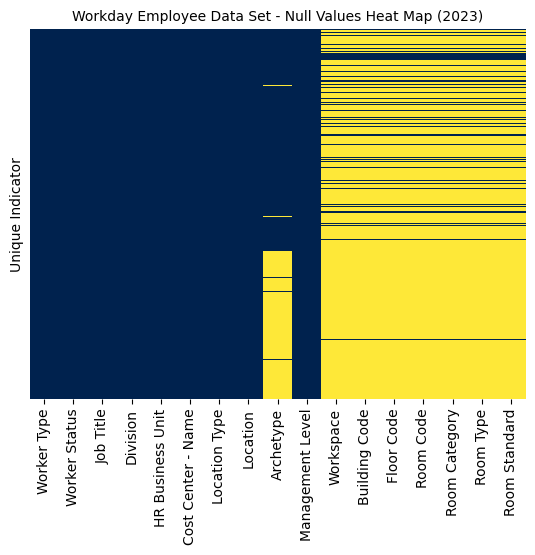

In [6]:
#create a heatmap for the df_2023 to view the null values
sns.heatmap(df_2023.isnull(), yticklabels=False, cbar=False, cmap='cividis')
plt.title('Workday Employee Data Set - Null Values Heat Map (2023)', fontsize= 10)

Text(0.5, 1.0, 'Workday Employee Data Set - Null Values Heat Map (2024)')

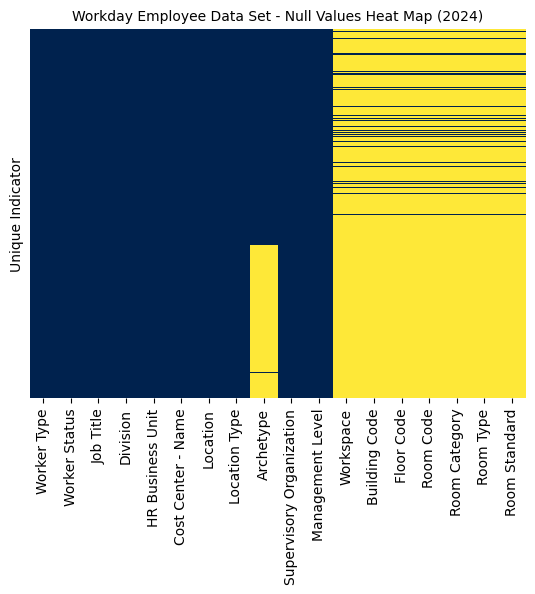

In [7]:
#create a heatmap for the df_2024 to view the null values
sns.heatmap(df_2024.isnull(), yticklabels=False, cbar=False, cmap='cividis')
plt.title('Workday Employee Data Set - Null Values Heat Map (2024)', fontsize= 10)

Text(0.5, 1.0, 'Archibus Seating Availability - Null Values Heat Map')

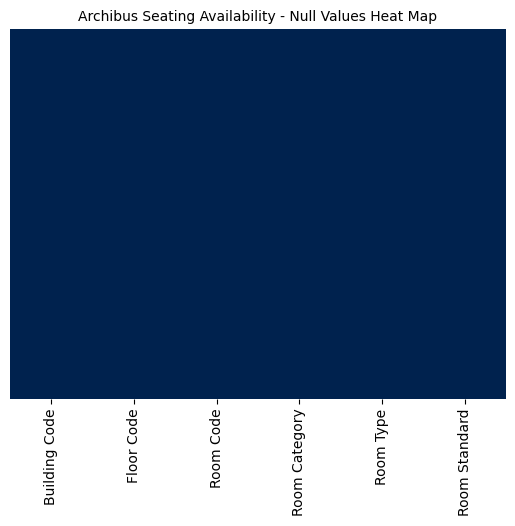

In [8]:
#create a heatmap for the df_archibus to view the null values
sns.heatmap(df_archibus.isnull(), yticklabels=False, cbar=False, cmap='cividis')
plt.title('Archibus Seating Availability - Null Values Heat Map', fontsize= 10)

In [9]:
# Identifing how many rows and columns for each df
dataframes= [df_2024, df_2023, df_archibus]
for dataframe in dataframes: 
    size = dataframe.shape
    print(size)


(9943, 18)
(9621, 17)
(2806, 6)


In [10]:
#Viewing the column names to copy and paste for cleaning/analysis for each df
for dataframe in dataframes: 
    col = dataframe.columns
    print(col)

Index(['Worker Type', 'Worker Status', 'Job Title', 'Division',
       'HR Business Unit', 'Cost Center - Name', 'Location', 'Location Type',
       'Archetype', 'Supervisory Organization', 'Management Level',
       'Workspace', 'Building Code', 'Floor Code', 'Room Code',
       'Room Category', 'Room Type', 'Room Standard'],
      dtype='object')
Index(['Worker Type', 'Worker Status', 'Job Title', 'Division',
       'HR Business Unit', 'Cost Center - Name', 'Location Type', 'Location',
       'Archetype', 'Management Level', 'Workspace', 'Building Code',
       'Floor Code', 'Room Code', 'Room Category', 'Room Type',
       'Room Standard'],
      dtype='object')
Index(['Building Code', 'Floor Code', 'Room Code', 'Room Category',
       'Room Type', 'Room Standard'],
      dtype='object')


In [11]:
#combine 2024 and 2023 dataframes
#step 1: add column for year to each df
df_2024['Year']= 2024
df_2023['Year'] = 2023
df_2023

,Worker Type,Worker Status,Job Title,Division,HR Business Unit,Cost Center - Name,Location Type,Location,Archetype,Management Level,Workspace,Building Code,Floor Code,Room Code,Room Category,Room Type,Room Standard,Year
Unique Indicator,,,,,,,,,,,,,,,,,,
1,Employee,Active,AD App Dev,Operations & IT,IT,E&B Program,Telecommuter,Remote - NJ,Remote,Asst Director,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023
2,Employee,Active,MarketPlace FE,State Programs and Commercial,Medicaid,PHSP Facilitated Enrollment,Field,Field - Long Island,Onsite,Individual Contributor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023
3,Employee,Active,Case Manager,Operations & IT,Clinical Operations,Utilization Management - II,Telecommuter,Remote - FL,Remote,Individual Contributor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023
4,Employee,Active,Claims Adjustment Examiner,Operations & IT,Operations,Claims Administration,Telecommuter,Remote - NY,Remote,Individual Contributor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023
5,Employee,Active,Case Manager,Operations & IT,Clinical Operations,Utilization Management - I,Telecommuter,Remote - NY,Remote,Individual Contributor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9617,Contingent Worker,Active,Consultant,Operations & IT,Operations,Claims Configuration,Telecommuter,Remote - TX,NaN,Individual Contributor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023
9618,Contingent Worker,Active,Consultant,Operations & IT,Operations,Claims Configuration,Telecommuter,Remote - NJ,NaN,Individual Contributor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023
9619,Contingent Worker,Active,Consultant,Operations & IT,Clinical Operations,Clinical Operations,Telecommuter,Remote - NY,NaN,Individual Contributor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023


In [12]:
#Step 2: combine 2024 and 2023 datasets using concat function
df_2324 = pd.concat([df_2024, df_2023], ignore_index=True)
df_2324

,Worker Type,Worker Status,Job Title,Division,HR Business Unit,Cost Center - Name,Location,Location Type,Archetype,Supervisory Organization,Management Level,Workspace,Building Code,Floor Code,Room Code,Room Category,Room Type,Room Standard,Year
0,Employee,Active,AD App Dev,Operations & IT,IT,E&B Program,Remote - NJ,Telecommuter,Remote,IT (Justin Miller),Asst Director,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024
1,Employee,Active,MarketPlace FE,State Programs and Commercial,Medicaid,PHSP Facilitated Enrollment,Field - Long Island,Field,Onsite,PHSP Facilitated Enrollment (Tatiana Cano),Individual Contributor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024
2,Employee,Active,Case Manager,Operations & IT,Clinical Operations,Utilization Management - II,Remote - FL,Telecommuter,Remote,Utilization Management (Awina Nueva),Individual Contributor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024
3,Employee,Active,Claims Adjustment Examiner,Operations & IT,Operations,Claims Administration,Remote - NY,Telecommuter,Remote,Claims (Anthwon Broussard),Individual Contributor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024
4,Employee,Active,Case Manager,Operations & IT,Clinical Operations,Utilization Management - I,Remote - NY,Telecommuter,Remote,Utilization Management (Awina Nueva),Individual Contributor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19559,Contingent Worker,Active,Consultant,Operations & IT,Operations,Claims Configuration,Remote - TX,Telecommuter,NaN,NaN,Individual Contributor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023
19560,Contingent Worker,Active,Consultant,Operations & IT,Operations,Claims Configuration,Remote - NJ,Telecommuter,NaN,NaN,Individual Contributor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023
19561,Contingent Worker,Active,Consultant,Operations & IT,Clinical Operations,Clinical Operations,Remote - NY,Telecommuter,NaN,NaN,Individual Contributor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023
19562,Contingent Worker,Active,Consultant,Operations & IT,IT,Correspondence Program,Remote - International,Offshore Contingent,NaN,NaN,Individual Contributor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023


In [13]:
#view how many columns the combined df now has
df_2324.shape

(19564, 19)

In [14]:
#see the count of non-null values and data types for each column
df_2324.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19564 entries, 0 to 19563
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Worker Type               19564 non-null  object 
 1   Worker Status             19564 non-null  object 
 2   Job Title                 19564 non-null  object 
 3   Division                  19564 non-null  object 
 4   HR Business Unit          19561 non-null  object 
 5   Cost Center - Name        19564 non-null  object 
 6   Location                  19564 non-null  object 
 7   Location Type             19564 non-null  object 
 8   Archetype                 11535 non-null  object 
 9   Supervisory Organization  9943 non-null   object 
 10  Management Level          19564 non-null  object 
 11  Workspace                 2300 non-null   object 
 12  Building Code             2300 non-null   object 
 13  Floor Code                2289 non-null   float64
 14  Room C

Text(0.5, 1.0, 'Workday Employee Data Set - Null Values Heat Map (2023-2024)')

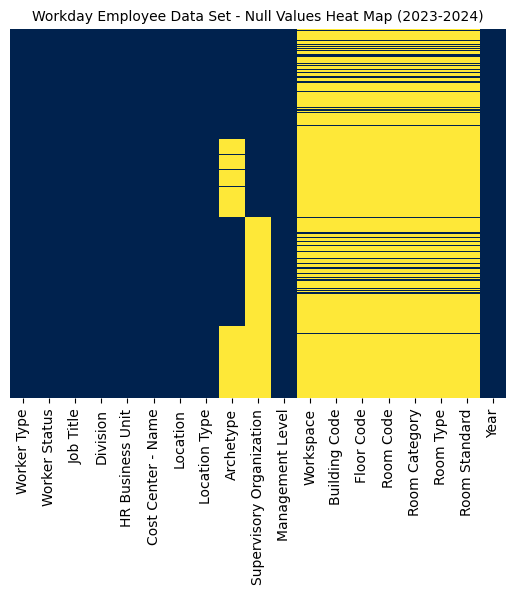

In [15]:
#create heat map to view null values for combined df_2324
sns.heatmap(df_2324.isnull(), yticklabels=False, cbar=False, cmap='cividis')
plt.title('Workday Employee Data Set - Null Values Heat Map (2023-2024)', fontsize= 10)

In [16]:
#view columns name of df_2324
df_2324.columns

Index(['Worker Type', 'Worker Status', 'Job Title', 'Division',
       'HR Business Unit', 'Cost Center - Name', 'Location', 'Location Type',
       'Archetype', 'Supervisory Organization', 'Management Level',
       'Workspace', 'Building Code', 'Floor Code', 'Room Code',
       'Room Category', 'Room Type', 'Room Standard', 'Year'],
      dtype='object')

In [17]:
#convert col with object data types  to string - created for loop and print datatype for each to confirm
tostring_list = ['Worker Type', 'Worker Status', 'Job Title',
       'Division', 'HR Business Unit', 'Cost Center - Name', 'Location',
       'Location Type', 'Archetype', 'Supervisory Organization',
       'Management Level', 'Workspace', 'Building Code', 'Room Category', 'Room Type']
for col in tostring_list: 
    df_2324[col] = df_2324[col].astype("string")

In [18]:
#view info of all columns to ensure data types were converted
df_2324.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19564 entries, 0 to 19563
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Worker Type               19564 non-null  string 
 1   Worker Status             19564 non-null  string 
 2   Job Title                 19564 non-null  string 
 3   Division                  19564 non-null  string 
 4   HR Business Unit          19561 non-null  string 
 5   Cost Center - Name        19564 non-null  string 
 6   Location                  19564 non-null  string 
 7   Location Type             19564 non-null  string 
 8   Archetype                 11535 non-null  string 
 9   Supervisory Organization  9943 non-null   string 
 10  Management Level          19564 non-null  string 
 11  Workspace                 2300 non-null   string 
 12  Building Code             2300 non-null   string 
 13  Floor Code                2289 non-null   float64
 14  Room C

In [19]:
#To see the unique values of intereseted rows- I created a for loop to print unique values of interested columns in list 
col_list = ['Worker Status','Division','HR Business Unit', 'Cost Center - Name', 'Location', 'Location Type', 'Archetype','Management Level','Room Category', 'Building Code', 'Room Standard']
for col in col_list: 
    print(col.upper())
    print(" Unique Values: ")
    print(df_2324[col].unique())
    print(" ")

WORKER STATUS
 Unique Values: 
<StringArray>
['Active', 'On Leave']
Length: 2, dtype: string
 
DIVISION
 Unique Values: 
<StringArray>
[              'Operations & IT', 'State Programs and Commercial',
           'Business Management',    'Medicare & Broker Services',
    'Delivery System Engagement',        'Chief Clinical Officer',
             'Hyphen Operations']
Length: 7, dtype: string
 
HR BUSINESS UNIT
 Unique Values: 
<StringArray>
[                                  'IT',
                             'Medicaid',
                  'Clinical Operations',
                           'Operations',
                              'Finance',
            'Legal,Regulatory, Privacy',
             'Medicare Sales & Product',
                                  'DSE',
                            'Total COO',
                  'Enterprise Delivery',
                                   'HR',
                'CMO Behavioral Health',
                            'Executive',
                 'Corp

In [20]:
#drop rows that have the value 'On Leave' for worker status
#step 1: rename column to remove spaces
df_2324= df_2324.rename(columns={'Worker Status': 'worker_status'})
df_2324.head(3)

,Worker Type,worker_status,Job Title,Division,HR Business Unit,Cost Center - Name,Location,Location Type,Archetype,Supervisory Organization,Management Level,Workspace,Building Code,Floor Code,Room Code,Room Category,Room Type,Room Standard,Year
0,Employee,Active,AD App Dev,Operations & IT,IT,E&B Program,Remote - NJ,Telecommuter,Remote,IT (Justin Miller),Asst Director,<NA>,<NA>,NaN,NaN,<NA>,<NA>,NaN,2024
1,Employee,Active,MarketPlace FE,State Programs and Commercial,Medicaid,PHSP Facilitated Enrollment,Field - Long Island,Field,Onsite,PHSP Facilitated Enrollment (Tatiana Cano),Individual Contributor,<NA>,<NA>,NaN,NaN,<NA>,<NA>,NaN,2024
2,Employee,Active,Case Manager,Operations & IT,Clinical Operations,Utilization Management - II,Remote - FL,Telecommuter,Remote,Utilization Management (Awina Nueva),Individual Contributor,<NA>,<NA>,NaN,NaN,<NA>,<NA>,NaN,2024


In [21]:
#Drop row - WORKER STATUS Unique Values: ['Active', 'On Leave']
df_2324 = df_2324[df_2324.worker_status != 'On Leave']

#check that it dropped all 'On Leave' values
df_2324['worker_status'].unique()

<StringArray>
['Active']
Length: 1, dtype: string

In [22]:
#view columns name to identify which ones I want to drop
df_2324.columns

Index(['Worker Type', 'worker_status', 'Job Title', 'Division',
       'HR Business Unit', 'Cost Center - Name', 'Location', 'Location Type',
       'Archetype', 'Supervisory Organization', 'Management Level',
       'Workspace', 'Building Code', 'Floor Code', 'Room Code',
       'Room Category', 'Room Type', 'Room Standard', 'Year'],
      dtype='object')

In [23]:
#drop columns not needed 
df = df_2324.drop(columns=['worker_status', 'Job Title','Division', 'HR Business Unit',
                           'Archetype', 'Supervisory Organization', 'Workspace', 'Building Code',
                           'Room Category', 'Room Type'
                          ])


df.head(10)

,Worker Type,Cost Center - Name,Location,Location Type,Management Level,Floor Code,Room Code,Room Standard,Year
0,Employee,E&B Program,Remote - NJ,Telecommuter,Asst Director,NaN,NaN,NaN,2024
1,Employee,PHSP Facilitated Enrollment,Field - Long Island,Field,Individual Contributor,NaN,NaN,NaN,2024
2,Employee,Utilization Management - II,Remote - FL,Telecommuter,Individual Contributor,NaN,NaN,NaN,2024
3,Employee,Claims Administration,Remote - NY,Telecommuter,Individual Contributor,NaN,NaN,NaN,2024
4,Employee,Utilization Management - I,Remote - NY,Telecommuter,Individual Contributor,NaN,NaN,NaN,2024
5,Employee,Provider Resolutions,Hybrid - NY,Headquarters,Manager,14.0,14-122,Cubicle Small,2024
6,Employee,PHSP Facilitated Enrollment,Field - Long Island,Field,Individual Contributor,NaN,NaN,NaN,2024
7,Employee,Infrastructure and Ops Program,Remote - NY,Telecommuter,Individual Contributor,NaN,NaN,NaN,2024
8,Employee,Mail Room,100 Church Street,Headquarters,Individual Contributor,17.0,NaN,NaN,2024
9,Employee,General Ledger & Statutory,Hybrid - NY,Headquarters,Director,18.0,18-619,Cubicle Medium,2024


In [24]:
#see unique values of Location column
df['Location'].unique()

<StringArray>
[                       'Remote - NJ',                'Field - Long Island',
                        'Remote - FL',                        'Remote - NY',
                        'Hybrid - NY',                  '100 Church Street',
                        'Remote - GA',                   'Field - Brooklyn',
            'Field - Bronx/Manhattan',                        'Hybrid - FL',
                        'Remote - WV',                            'Yonkers',
                        'Remote - NC',                        'Remote - PA',
                        'Remote - CT',                        'Remote - VA',
                     'Field - Queens',                   'Field - New York',
                  'Field - Manhattan',                'Field - Westchester',
                        'Remote - SC',                      'Field - Bronx',
                        'Remote - ME',                  'Field - Interboro',
                        'Remote - MD',                        

In [25]:
#rename location column values using mapping function 
df['Location'] = df['Location'].map({'Remote - NJ': 'Remote', 'Field - Long Island': 'Field', 'Remote - FL': 'Remote', 
                                     'Remote - NY': 'Remote', 'Remote - GA': 'Remote','Field - Brooklyn': 'Field', 
                                     'Field - Bronx/Manhattan': 'Field', 'Remote - WV': 'Remote','Remote - NC': 'Remote',
                                     'Remote - PA': 'Remote','Remote - CT': 'Remote', 'Remote - VA': 'Remote', 
                                     'Field - Queens': 'Field', 'Field - New York': 'Field','Field - Manhattan': 'Field', 
                                     'Field - Westchester': 'Field', 'Remote - SC' : 'Remote','Field - Bronx':'Field', 
                                     'Remote - ME': 'Remote', 'Field - Interboro': 'Field', 'Remote - MD': 'Remote',
                                     'Remote - AL': 'Remote', 'Remote - OH': 'Remote', 'Remote - DE': 'Remote', 
                                     'Remote - TX': 'Remote','Remote - WI': 'Remote', 'Remote - AZ': 'Remote', 
                                     'Remote - KS': 'Remote', 'Remote - SD': 'Remote','Field - Staten Island': 'Field', 
                                     'Remote - TN': 'Remote', 'Remote - WA': 'Remote','Remote - MN': 'Remote', 
                                     'Remote - MA': 'Remote', 'Remote - NV': 'Remote', 'Remote - CO': 'Remote', 
                                     'Remote - IL': 'Remote', 'Field - Orange': 'Field', 'Remote - UT': 'Remote',
                                     'Field - Rockland': 'Field', 'Remote - MI': 'Remote','Field - Mid - Hudson': 'Field', 
                                     'Remote - MS': 'Remote', 'Field - Bronx/Queens': 'Field','Remote - LA': 'Remote', 
                                     'Remote - IA': 'Remote', 'Remote - MT': 'Remote', 'Remote - NH': 'Remote',
                                     'Remote - OK': 'Remote', 'Remote - IN': 'Remote', 'Remote - NM': 'Remote', 
                                     'Remote - NE': 'Remote', 'Remote - International (Offshore)': 'Remote', 
                                     'Remote - CA': 'Remote','Remote - USA':'Remote', 'Remote - WY': 'Remote', 
                                     'Remote - RI': 'Remote', 'Remote - International (Nearshore)': 'Remote', 
                                     'Remote - ND': 'Remote','Remote - International': 'Remote', 'Remote - VT': 'Remote',
                                     '1101 Greenwood': '1101 Greenwood', '100 Church Street': '100 Church St', 
                                     'Hybrid - NY': 'Hybrid - NY', 'Hybrid - FL': 'Hybrid - FL', 'Hybrid - CT': 'Hybrid - CT',
                                     'Bronx': 'Bronx', 'Yonkers': 'Yonkers', 
                                    })





In [26]:
#see unique values of Location column after mapping exercise
df['Location'].unique()

array(['Remote', 'Field', 'Hybrid - NY', '100 Church St', 'Hybrid - FL',
       'Yonkers', '1101 Greenwood', 'Hybrid - CT', 'Bronx'], dtype=object)

In [27]:
#final clean data
df

,Worker Type,Cost Center - Name,Location,Location Type,Management Level,Floor Code,Room Code,Room Standard,Year
0,Employee,E&B Program,Remote,Telecommuter,Asst Director,NaN,NaN,NaN,2024
1,Employee,PHSP Facilitated Enrollment,Field,Field,Individual Contributor,NaN,NaN,NaN,2024
2,Employee,Utilization Management - II,Remote,Telecommuter,Individual Contributor,NaN,NaN,NaN,2024
3,Employee,Claims Administration,Remote,Telecommuter,Individual Contributor,NaN,NaN,NaN,2024
4,Employee,Utilization Management - I,Remote,Telecommuter,Individual Contributor,NaN,NaN,NaN,2024
...,...,...,...,...,...,...,...,...,...
19559,Contingent Worker,Claims Configuration,Remote,Telecommuter,Individual Contributor,NaN,NaN,NaN,2023
19560,Contingent Worker,Claims Configuration,Remote,Telecommuter,Individual Contributor,NaN,NaN,NaN,2023
19561,Contingent Worker,Clinical Operations,Remote,Telecommuter,Individual Contributor,NaN,NaN,NaN,2023
19562,Contingent Worker,Correspondence Program,Remote,Offshore Contingent,Individual Contributor,NaN,NaN,NaN,2023


In [28]:
#start cleaning archibus data - looking at columns
df_archibus.columns

Index(['Building Code', 'Floor Code', 'Room Code', 'Room Category',
       'Room Type', 'Room Standard'],
      dtype='object')

In [29]:
#view df
df_archibus

,Building Code,Floor Code,Room Code,Room Category,Room Type,Room Standard
0,LOC001,14,14-100,WORKSPACE,WCM,Cubicle Medium
1,LOC001,14,14-101,WORKSPACE,WCS,Cubicle Small
2,LOC001,14,14-102,WORKSPACE,WCS,Cubicle Small
3,LOC001,14,14-103,WORKSPACE,WCS,Cubicle Small
4,LOC001,14,14-104,WORKSPACE,WCS,Cubicle Small
...,...,...,...,...,...,...
2801,LOC003,5,05-843,WORKSPACE,WCM,Cubicle Medium
2802,LOC003,5,05-844,WORKSPACE,WCM,Cubicle Medium
2803,LOC003,5,05-845,WORKSPACE,WOM,Office Medium
2804,LOC003,5,05-846,WORKSPACE,WOM,Office Medium


In [30]:
#create df to capture only the room code that are occupied for 2023
#remove all null values in room code column to get all the rooms that are occupied in 2023
df_23_occupied = df_2023[df_2023['Room Code'].notnull()]
df_23_occupied


,Worker Type,Worker Status,Job Title,Division,HR Business Unit,Cost Center - Name,Location Type,Location,Archetype,Management Level,Workspace,Building Code,Floor Code,Room Code,Room Category,Room Type,Room Standard,Year
Unique Indicator,,,,,,,,,,,,,,,,,,
6,Employee,Active,Mgr Claims Configuration,Operations & IT,Operations,Provider Resolutions,Headquarters,Hybrid - NY,Hybrid,Manager,LOC001>14>14-122,LOC001,14.0,14-122,WORKSPACE,WCS,Cubicle Small,2023
10,Employee,Active,Dir Finance,Business Management,Finance,General Ledger & Statutory,Headquarters,Hybrid - NY,Hybrid,Director,LOC001>18>18-619,LOC001,18.0,18-619,WORKSPACE,WCM,Cubicle Medium,2023
12,Employee,Active,IT Business Manager,Operations & IT,IT,Portfolio Program,Headquarters,Hybrid - NY,Hybrid,Manager,LOC001>17>17-414,LOC001,17.0,17-414,WORKSPACE,WCM,Cubicle Medium,2023
17,Employee,Active,TL Facilities Support,Business Management,Total COO,Facilities,Headquarters,100 Church Street,Onsite,Team Lead,LOC001>19>19-723,LOC001,19.0,19-723,WORKSPACE,WCM,Cubicle Medium,2023
18,Employee,Active,AVP Enterprise Delivery Services,Operations & IT,Enterprise Delivery,Claims Program,Headquarters,Hybrid - NY,Hybrid,AVP,LOC001>15>15-705,LOC001,15.0,15-705,WORKSPACE,WOS,Office Small,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7438,Contingent Worker,Active,Consultant,Operations & IT,IT,Correspondence Program,Telecommuter,Remote - NY,NaN,Individual Contributor,LOC001>17>17-720,LOC001,17.0,17-720,WORKSPACE,WCM,Cubicle Medium,2023
8082,Contingent Worker,Active,Consultant,Operations & IT,Operations,Contact Center Operations,Offshore Contingent,Remote - International,NaN,Individual Contributor,LOC001>14>14-551,LOC001,14.0,14-551,WORKSPACE,WCS,Cubicle Small,2023
8824,Contingent Worker,Active,Consultant,Operations & IT,IT,Provider Data Mgmt Program,Headquarters,Hybrid - NY,NaN,Individual Contributor,LOC001>17>17-633,LOC001,17.0,17-633,WORKSPACE,WCM,Cubicle Medium,2023


In [31]:
#drop all columns not needed - by filtering the ones that I only want
df_23_occupied = df_23_occupied.filter(['Room Code'])
df_23_occupied

,Room Code
Unique Indicator,
6,14-122
10,18-619
12,17-414
17,19-723
18,15-705
...,...
7438,17-720
8082,14-551
8824,17-633


In [32]:
#add new column to indicate occupancy (occupied = 1)
df_23_occupied['Occupancy_2023'] = 1
df_23_occupied

,Room Code,Occupancy_2023
Unique Indicator,,
6,14-122,1
10,18-619,1
12,17-414,1
17,19-723,1
18,15-705,1
...,...,...
7438,17-720,1
8082,14-551,1
8824,17-633,1


In [33]:
#drop dups 
df_23_occupied.drop_duplicates(subset=['Room Code'], inplace=True) 
df_23_occupied

,Room Code,Occupancy_2023
Unique Indicator,,
6,14-122,1
10,18-619,1
12,17-414,1
17,19-723,1
18,15-705,1
...,...,...
7438,17-720,1
8082,14-551,1
8824,17-633,1


In [34]:
#merge data sets - archibus data and 2023 room occupancy 
df_archibus_2023 = pd.merge(df_archibus, df_23_occupied, how="left", on="Room Code")
#.set_index("Room Code", inplace=True)

In [35]:
#view df
df_archibus_2023

,Building Code,Floor Code,Room Code,Room Category,Room Type,Room Standard,Occupancy_2023
0,LOC001,14,14-100,WORKSPACE,WCM,Cubicle Medium,1.0
1,LOC001,14,14-101,WORKSPACE,WCS,Cubicle Small,NaN
2,LOC001,14,14-102,WORKSPACE,WCS,Cubicle Small,NaN
3,LOC001,14,14-103,WORKSPACE,WCS,Cubicle Small,NaN
4,LOC001,14,14-104,WORKSPACE,WCS,Cubicle Small,NaN
...,...,...,...,...,...,...,...
2801,LOC003,5,05-843,WORKSPACE,WCM,Cubicle Medium,NaN
2802,LOC003,5,05-844,WORKSPACE,WCM,Cubicle Medium,1.0
2803,LOC003,5,05-845,WORKSPACE,WOM,Office Medium,NaN
2804,LOC003,5,05-846,WORKSPACE,WOM,Office Medium,NaN


In [36]:
#checking that the count matches rows in df_occupied_23 (1145)
df_archibus_2023[df_archibus_2023['Occupancy_2023'] == 1].count()

Building Code     1145
Floor Code        1145
Room Code         1145
Room Category     1145
Room Type         1145
Room Standard     1145
Occupancy_2023    1145
dtype: int64

In [37]:
# Add 2024 data to df_archibus
#new df to capture only the room code that are occupied for 2024
df_24_occupied = df_2024[df_2024['Room Code'].notnull()]
df_24_occupied

,Worker Type,Worker Status,Job Title,Division,HR Business Unit,Cost Center - Name,Location,Location Type,Archetype,Supervisory Organization,Management Level,Workspace,Building Code,Floor Code,Room Code,Room Category,Room Type,Room Standard,Year
Unique Indicator,,,,,,,,,,,,,,,,,,,
6,Employee,Active,Mgr Claims Configuration,Operations & IT,Operations,Provider Resolutions,Hybrid - NY,Headquarters,Hybrid,DSE - Operations (Helen Holmes),Manager,LOC001>14>14-122,LOC001,14.0,14-122,WORKSPACE,WCS,Cubicle Small,2024
10,Employee,Active,Dir Finance,Business Management,Finance,General Ledger & Statutory,Hybrid - NY,Headquarters,Hybrid,Finance Leadership (Craig Barattin),Director,LOC001>18>18-619,LOC001,18.0,18-619,WORKSPACE,WCM,Cubicle Medium,2024
12,Employee,Active,IT Business Manager,Operations & IT,IT,Portfolio Program,Hybrid - NY,Headquarters,Hybrid,IT (Jeanine Gibson),Manager,LOC001>17>17-414,LOC001,17.0,17-414,WORKSPACE,WCM,Cubicle Medium,2024
17,Employee,Active,TL Facilities Support,Business Management,Total COO,Facilities,100 Church Street,Headquarters,Onsite,Facilities (Nicholas Nilio),Team Lead,LOC001>19>19-723,LOC001,19.0,19-723,WORKSPACE,WCM,Cubicle Medium,2024
18,Employee,Active,AVP Enterprise Delivery Services,Operations & IT,Enterprise Delivery,Claims Program,Hybrid - NY,Headquarters,Hybrid,Enterprise Delivery (Liz Wetmore),AVP,LOC001>15>15-705,LOC001,15.0,15-705,WORKSPACE,WOS,Office Small,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6114,Contingent Worker,Active,IT Consultant,Operations & IT,IT,Clinical Program,100 Church Street,Headquarters,NaN,IT (Abhishek Maitra),Individual Contributor,LOC001>17>17-601,LOC001,17.0,17-601,WORKSPACE,WCM,Cubicle Medium,2024
6252,Contingent Worker,Active,Wipro TL,Operations & IT,Operations,Mail Room,100 Church Street,Headquarters,NaN,Ops Centralized Svcs (Chakyra Simmons),Individual Contributor,LOC001>14>14-518,LOC001,14.0,14-518,WORKSPACE,WCM,Cubicle Medium,2024
6322,Contingent Worker,Active,Enrollment Rep,Operations & IT,Operations,Enrollment & Billing,Remote - International (Offshore),Offshore Contingent,NaN,Enrollment & Billing (Cassie Dwello),Individual Contributor,LOC001>17>17-218,LOC001,17.0,17-218,WORKSPACE,WCM,Cubicle Medium,2024


In [38]:
#drop all columns not needed by filtering the column
df_24_occupied = df_24_occupied.filter(['Room Code'], axis=1)
df_24_occupied

,Room Code
Unique Indicator,
6,14-122
10,18-619
12,17-414
17,19-723
18,15-705
...,...
6114,17-601
6252,14-518
6322,17-218


In [39]:
#add new column to indicate occupancy 
df_24_occupied['Occupancy_2024'] = 1
df_24_occupied

,Room Code,Occupancy_2024
Unique Indicator,,
6,14-122,1
10,18-619,1
12,17-414,1
17,19-723,1
18,15-705,1
...,...,...
6114,17-601,1
6252,14-518,1
6322,17-218,1


In [40]:
#drop dups 
df_24_occupied.drop_duplicates(subset=['Room Code'], inplace=True) 
df_24_occupied

,Room Code,Occupancy_2024
Unique Indicator,,
6,14-122,1
10,18-619,1
12,17-414,1
17,19-723,1
18,15-705,1
...,...,...
6114,17-601,1
6252,14-518,1
6322,17-218,1


In [41]:
#left join to identified what rooms were occupied from the list of all rooms
# df_archibus_2324 = pd.merge(df_archibus_2023,  
#                      df_24_occupied,  
#                      on ='Room Code',  
#                      how ='left') 

df_archibus_2024 = pd.merge(df_archibus_2023, df_24_occupied, how="left", on="Room Code")


In [42]:
#view df column and row count
df_archibus_2024.shape

(2806, 8)

In [43]:
#get the count of when occupancy_2024 =1 to confirm it adds up to 1070 (number of rows)
df_archibus_2024[df_archibus_2024['Occupancy_2024'] == 1].count()

Building Code     1070
Floor Code        1070
Room Code         1070
Room Category     1070
Room Type         1070
Room Standard     1070
Occupancy_2023    1014
Occupancy_2024    1070
dtype: int64

In [45]:
#statistical analyses of archibus data
df_archibus_2024.describe()

,Floor Code,Occupancy_2023,Occupancy_2024
count,2806.000000,1145.0,1070.0
mean,10.982894,1.0,1.0
std,6.592903,0.0,0.0
min,1.000000,1.0,1.0
25%,4.000000,1.0,1.0
50%,14.000000,1.0,1.0
75%,17.000000,1.0,1.0
max,19.000000,1.0,1.0


# Exporting clean data sets to csv files to load into Tableau for Visualizations

In [44]:
# export dataframes to CSV file to load into Tableau
#df_archibus_2024.to_csv("Archibus_Occupancy_Data_2024.csv", index = False)
#df.to_csv('Employee_Data_2024_2.csv') 